# Check working of "createHistogram" method of RooFit

In [2]:
import ROOT as r

r.gSystem.Load("PDFs/PdfDiagonalizer_cc.so")
r.gSystem.Load("PDFs/Util_cxx.so")
r.gSystem.Load("PDFs/HWWLVJRooPdfs_cxx.so")

msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_2018_01_07_12h02/HaddedFiles/Hadds_for_BkgEstimation/WWTree_WJets.root")

treeIn = fin.Get("otree")

Welcome to JupyROOT 6.08/05


In [3]:
h1 = r.TH1F("h1","",22,170,2502)

h2 = r.TH1F("h2","",22,170,2502)

cutString_SideBand =  "((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>40 && PuppiAK8_jet_mass_so<65) || (PuppiAK8_jet_mass_so>105 && PuppiAK8_jet_mass_so<150)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"

cutString_SideBand2 =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>40 && PuppiAK8_jet_mass_so<65) || (PuppiAK8_jet_mass_so>105 && PuppiAK8_jet_mass_so<150)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"


treeIn.Draw("mass_lvj_type0>>h1",cutString_SideBand)
treeIn.Draw("mass_lvj_type0>>h2",cutString_SideBand2)
print h1.Integral(),h2.Integral()

10782.0 618.742163211


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [4]:
rrv_x = r.RooRealVar("rrv_x","AK8 invariant mass",170,3500);

dh =  r.RooDataHist("dh","plotOn test data with x",r.RooArgList(rrv_x),h1)
dh2 =  r.RooDataHist("dh2","plotOn test data with x (with weight)",r.RooArgList(rrv_x),h2)

In [5]:
# Landau PDF
rrv_c_landau = r.RooRealVar("rrv_c_landau","rrv_c_landau",50,20,2500);
rrv_n_landau = r.RooRealVar("rrv_n_landau","rrv_n_landau",10,10,500);
model_landau = r.RooLandau("model_landau","model_landau",rrv_x,rrv_c_landau,rrv_n_landau) 

# ExpN PDF
rrv_c_ExpN = r.RooRealVar("rrv_c_ExpN","rrv_c_ExpN",-5.32e-3,-1e-1,-1e-6);
rrv_n_ExpN = r.RooRealVar("rrv_n_ExpN","rrv_n_ExpN", -940.3, -1e4, -900);
model_ExpN = r.RooExpNPdf("model_ExpN","model_ExpN",rrv_x,rrv_c_ExpN, rrv_n_ExpN);

# Add two pdf
frac = r.RooRealVar("frac","frac",0.5,0.,1.)
model_pdf = r.RooAddPdf("model_pdf","model_pdf",r.RooArgList(model_landau,model_ExpN),r.RooArgList(frac));

In [6]:
model_pdf.fitTo(dh,r.RooFit.Save(1) ,r.RooFit.Extended(r.kTRUE), r.RooFit.NumCPU(2))

model_pdf.fitTo(dh,r.RooFit.Save(1) ,r.RooFit.Extended(r.kTRUE), r.RooFit.Minimizer("Minuit2"), r.RooFit.NumCPU(2))

<ROOT.RooFitResult object ("fitresult_model_pdf_dh") at 0x70223f0>

 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 rrv_c_ExpN  -5.32000e-03  2.65950e-03   -1.00000e-01 -1.00000e-06
     3 rrv_c_landau   5.00000e+01  1.50000e+01    2.00000e+01  2.50000e+03
     4 rrv_n_ExpN  -9.40300e+02  2.01500e+01   -1.00000e+04 -9.00000e+02
     5 rrv_n_landau   1.00000e+01  4.90000e+01    1.00000e+01  5.00000e+02
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE5 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE5 BROUGHT BACK INSIDE LIMITS.
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SP

Info in <Minuit2>: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in <Minuit2>: Current  Edm is : edm = 17.0983
Info in <Minuit2>: Required Edm is : edmval = 0.001
Info in <Minuit2>: DavidonErrorUpdator: delgam < 0 : first derivatives increasing along search line
Info in <Minuit2>: VariableMetricBuilder: matrix not pos.def, gdel > 0
Info in <Minuit2>: gdel = 23.9239
Info in <Minuit2>: negative or zero diagonal element in covariance matrix : i = 1
Info in <Minuit2>: negative or zero diagonal element in covariance matrix : i = 3
Info in <Minuit2>: added to diagonal of Error matrix a value : dg = 0.500002
Info in <Minuit2>: gdel = -1.80553e+07
Info in <Minuit2>: VariableMetricBuilder: no improvement in line search
Info in <Minuit2>: VariableMetricBuilder: iterations finish without convergence.
Info in <Minuit2>: VariableMetricBuilder : edm = 16891.8
Info in <Minuit2>:             requested : edmval = 0.001
Info in <Minuit2>: VariableMetricBuilder: Funct

In [7]:
model_pdf.Print()
print "--"*20
model_pdf.getParameters(r.RooArgSet(rrv_x)).Print("v")

RooAddPdf::model_pdf[ frac * model_landau + [%] * model_ExpN ] = 0.00216734
----------------------------------------
  1) 0x7b1cd60 RooRealVar::         frac = 0.280341 +/- 0.0258298  L(0 - 1)  "frac"
  2) 0x7a74430 RooRealVar::   rrv_c_ExpN = -0.00490924 +/- 0.000109728  L(-0.1 - -1e-06)  "rrv_c_ExpN"
  3) 0x7a44380 RooRealVar:: rrv_c_landau = 424.533 +/- 14.8655  L(20 - 2500)  "rrv_c_landau"
  4) 0x7ae8420 RooRealVar::   rrv_n_ExpN = -1189.81 +/- 0.186742  L(-10000 - -900)  "rrv_n_ExpN"
  5) 0x7a52090 RooRealVar:: rrv_n_landau = 111.32 +/- 7.91782  L(10 - 500)  "rrv_n_landau"


In [8]:
print model_pdf.getVal()

# Below line defines a custom range named highMass. This can be used while calculating the integral
# over this range instead of full range of `rrv_x`
rrv_x.setRange("highMass",600,2000)
print model_pdf.createIntegral(r.RooArgSet(rrv_x),r.RooArgSet(rrv_x)).getVal()
print model_pdf.createIntegral(r.RooArgSet(rrv_x),r.RooArgSet(rrv_x),"highMass").getVal()

0.00216733675412
1.00018046102
0.474046932375


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file test.png has been created


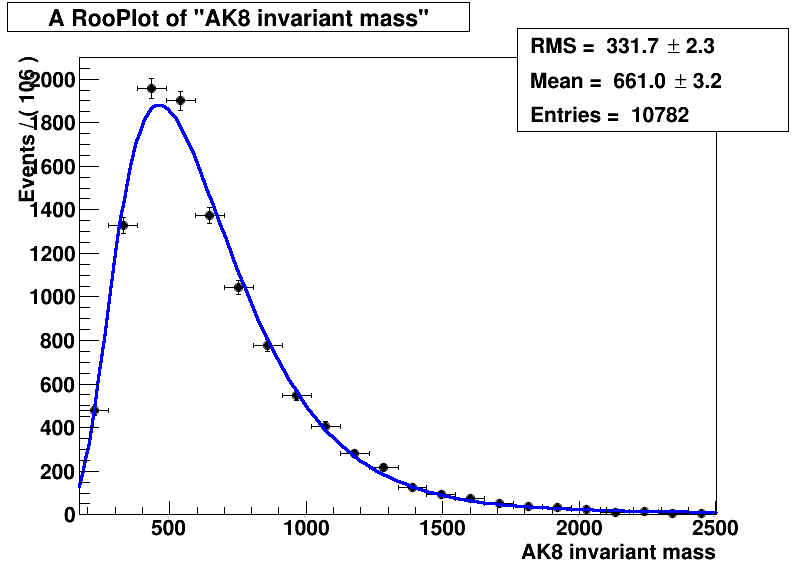

In [9]:
c1 = r.TCanvas("c1","c1",800,600)
frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame);  #//this will display hist stat on canvas
model_pdf.plotOn(frame)
frame.Draw()
c1.Draw()
c1.SaveAs("test.png")

1.00026483936
1.00031224644
1.00041452618
1.00070539769
1.00226768304
1.01353141991
1.13499096362


Warning in <TNetXNGFile::Append>: Replacing existing TH1: rrv_x__rrv_x (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: model_pdf__rrv_x (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: model_pdf__rrv_x (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: model_pdf__rrv_x (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: model_pdf__rrv_x (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: model_pdf__rrv_x (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: model_pdf__rrv_x (Potential memory leak).


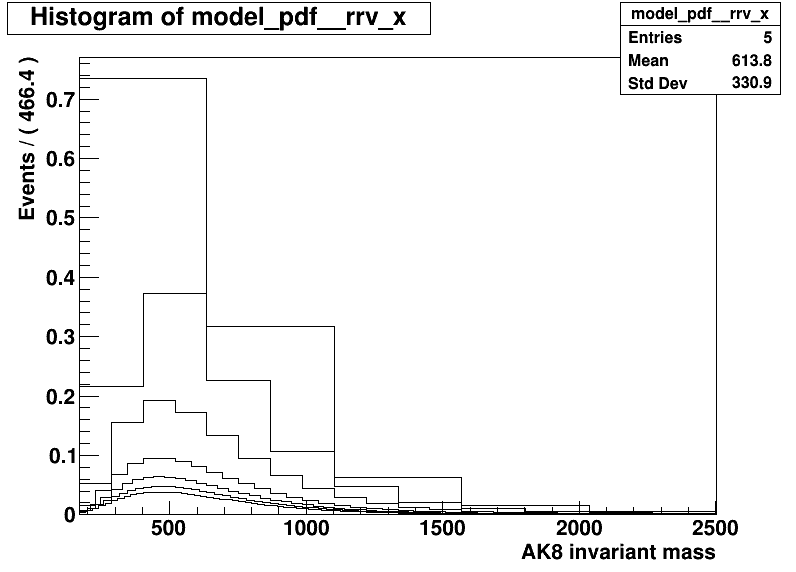

In [13]:
hist1 = model_pdf.createHistogram(rrv_x.GetName(),rrv_x)
hist2 = model_pdf.createHistogram(rrv_x.GetName(),80)
hist3 = model_pdf.createHistogram(rrv_x.GetName(),60)
hist4 = model_pdf.createHistogram(rrv_x.GetName(),40)
hist5 = model_pdf.createHistogram(rrv_x.GetName(),20)
hist6 = model_pdf.createHistogram(rrv_x.GetName(),10)
hist7 = model_pdf.createHistogram(rrv_x.GetName(),5)

print hist1.Integral()
print hist2.Integral()
print hist3.Integral()
print hist4.Integral()
print hist5.Integral()
print hist6.Integral()
print hist7.Integral()

hist7.Draw()
hist6.Draw("same")
hist5.Draw("same")
hist4.Draw("same")
hist3.Draw("same")
hist2.Draw("same")
hist1.Draw("same")
c1.Draw()